Created by: Damien Stephens <br>
Created on: August 27, 2020

A simple example of a convolutional neural network (CNN) for object recognition in images using the CIFAR-10 dataset.

# Imports

In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import confusion_matrix, accuracy_score

# Data Preprocessing

In [2]:
# import the cifar10 dataset from tensorflow
from tensorflow.keras.datasets import cifar10

# load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# print the shape of the loaded data
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape:  {x_test.shape}')
print(f'y_test shape:  {y_train.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (50000, 1)


In [3]:
# create a list to hold the category labels
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', 
               '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [4]:
# check the minimum, maximum, and mean values in x_train and y_train
print(f'x_train max:  {x_train.max()}')
print(f'x_train min:  {x_train.min()}')
print(f'x_train mean: {x_train.mean():.2f}')
print('--------------------')
print(f'y_train max:  {y_train.max()}')
print(f'y_train min:  {y_train.min()}')
print(f'y_train mean: {y_train.mean():.2f}')

x_train max:  255
x_train min:  0
x_train mean: 120.71
--------------------
y_train max:  9
y_train min:  0
y_train mean: 4.50


In [5]:
# normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# check the new minimum, maximum, and mean values in x_train
print(f'x_train max:  {x_train.max()}')
print(f'x_train min:  {x_train.min()}')
print(f'x_train mean: {x_train.mean():.2f}')

x_train max:  1.0
x_train min:  0.0
x_train mean: 0.47


In [7]:
# check the shape of x_train and x_test
# x_train: 50000 images, 32 x 32 in size, with a depth of 3 (RGB)
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape:  {x_test.shape}')

x_train shape: (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)


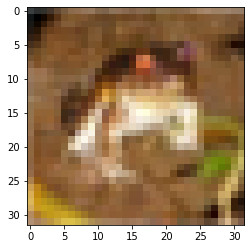

6: frog


In [8]:
# check one of the images and verify what it is
plt.imshow(x_train[0])
plt.show()
print(class_names[y_train[0][0]])

# Build the CNN

In [9]:
# define the object
model = tf.keras.models.Sequential()

In [10]:
# add the 1st CNN layer
# parameters:
# 1) filters (kernel) = 32
# 2) kernel size = 3
# 3) padding = same
# 4) activation function = relu
# 5) input shape = (32, 32, 3)
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

In [11]:
# add 2nd CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# maxpool layer
# parameters:
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [12]:
# add 3rd CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [13]:
# add 4th CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# add 2nd maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [14]:
# add dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [15]:
# add flattening layer
model.add(tf.keras.layers.Flatten())

In [16]:
# add the fully connected (dense) layers

# add the first dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# add the second dense layer (output layer)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [17]:
# show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

# Train the Model

In [18]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [19]:
# train the model
model.fit(x_train, y_train, batch_size=128, epochs=24)

Epoch 1/24
391/391 [==============================] - 43s 109ms/step - loss: 1.5123 - sparse_categorical_accuracy: 0.4544
Epoch 2/24
391/391 [==============================] - 43s 111ms/step - loss: 1.0886 - sparse_categorical_accuracy: 0.6149
Epoch 3/24
391/391 [==============================] - 46s 117ms/step - loss: 0.9172 - sparse_categorical_accuracy: 0.6766
Epoch 4/24
391/391 [==============================] - 46s 118ms/step - loss: 0.8098 - sparse_categorical_accuracy: 0.7142
Epoch 5/24
391/391 [==============================] - 46s 119ms/step - loss: 0.7196 - sparse_categorical_accuracy: 0.7468
Epoch 6/24
391/391 [==============================] - 47s 120ms/step - loss: 0.6542 - sparse_categorical_accuracy: 0.7698
Epoch 7/24
391/391 [==============================] - 47s 120ms/step - loss: 0.5937 - sparse_categorical_accuracy: 0.7911
Epoch 8/24
391/391 [==============================] - 46s 117ms/step - loss: 0.5416 - sparse_categorical_accuracy: 0.8072
Epoch 9/24
391/391 [====

# Evaluate the Model and Make Predictions

In [20]:
# evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8644 - sparse_categorical_accuracy: 0.7754


In [21]:
# make predictions
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [44]:
# check individual predictions
index = 0
print(f'Predicted at index {index} - {class_names[y_pred[index]]}')
print(f'Actual at index {index}    - {class_names[y_test[index][0]]}')

Predicted at index 0 - 3: cat
Actual at index 0    - 3: cat


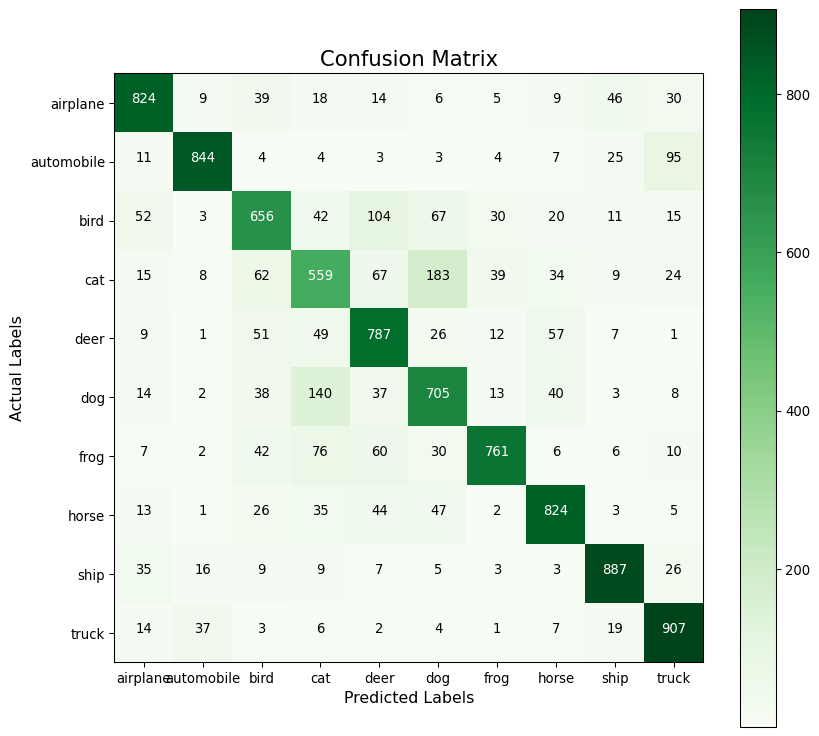

In [48]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

cm = confusion_matrix(y_test, y_pred)

nr_rows = cm.shape[0]
nr_cols = cm.shape[1]

plt.figure(figsize=(10,10), dpi=95)
plt.imshow(cm, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, label_names)
plt.xticks(tick_marks, label_names)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
            color='white' if cm[i, j] > cm.max()/2 else 'black')
    
plt.show()

In [50]:
acc_cm = accuracy_score(y_test, y_pred)
print(f'Accuracy score from confusion matrix: {acc_cm*100:.2f}%')

Accuracy score from confusion matrix: 77.54%
